In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("../data/Processed/CustomerChurn_cleaned.cvs")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [30]:
df.describe()

,Unnamed: 0,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,64.761692,2279.734304
std,2033.283305,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,1760.500000,9.000000,35.500000,398.550000
50%,3521.000000,29.000000,70.350000,1394.550000
75%,5281.500000,55.000000,89.850000,3786.600000
max,7042.000000,72.000000,118.750000,8684.800000


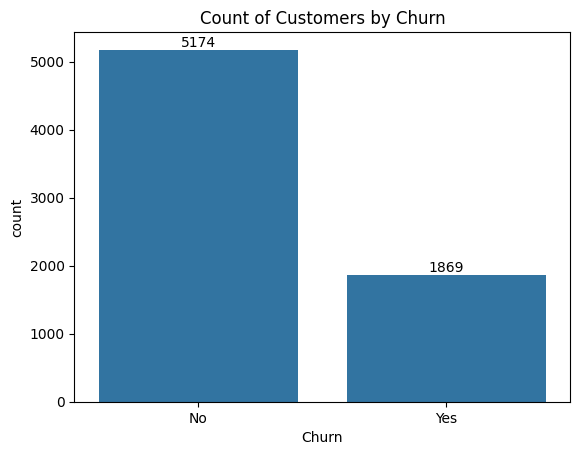

In [31]:
ax = sns.countplot(x="Churn", data=df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.savefig("../report/visuals/churn_count.png", bbox_inches = "tight")
plt.show()

In [32]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


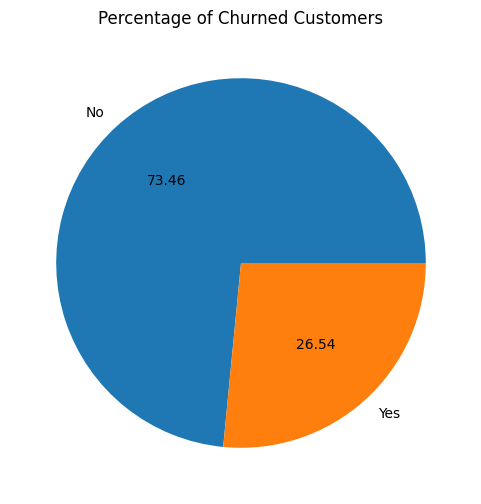

In [33]:
plt.figure(figsize=(6,6))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"], labels=gb.index, autopct="%1.2f")
plt.title("Percentage of Churned Customers")
plt.savefig("../report/visuals/Percentage_of_Churned_Customers.png", bbox_inches = "tight")
plt.show()

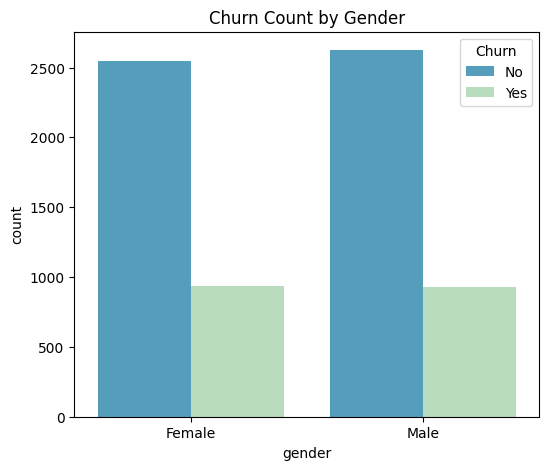

In [34]:
plt.figure(figsize=(6,5))
sns.countplot(x="gender", data=df, hue="Churn", palette="GnBu_r")
plt.title("Churn Count by Gender")
plt.savefig("../report/visuals/Churn_count_by_gender.png", bbox_inches="tight" )
plt.show()

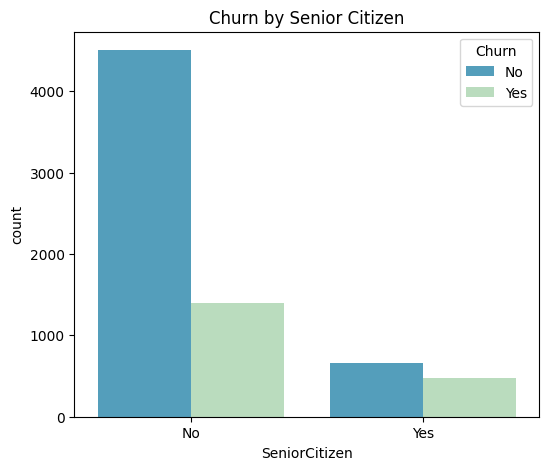

In [35]:
plt.figure(figsize=(6,5))
sns.countplot(x="SeniorCitizen", data=df, hue="Churn", palette="GnBu_r")
plt.title("Churn by Senior Citizen")
plt.savefig("../report/visuals/Churn_count_by_gender.png", bbox_inches="tight" )
plt.show()

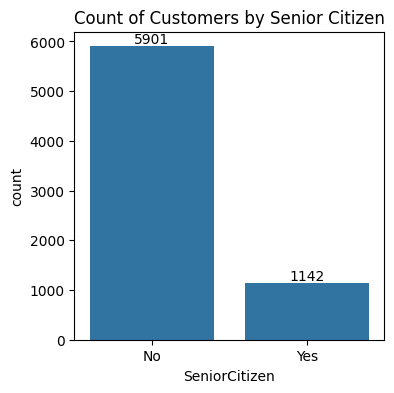

In [36]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")
plt.savefig("../report/visuals/CountofCustomers_by_sernior_citizen.png", bbox_inches="tight")
plt.show()

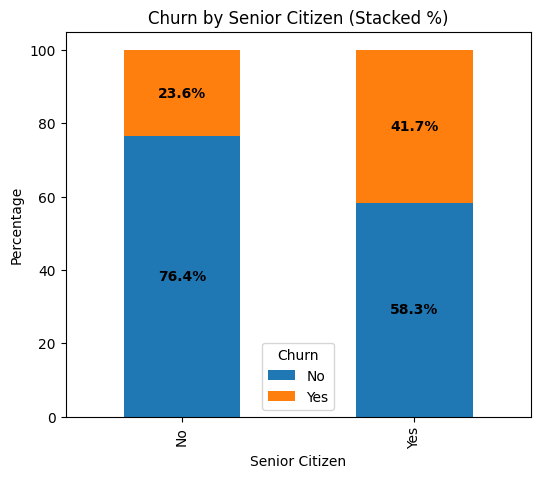

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already loaded
df_grouped = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()

# Convert counts to percentages
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plot
ax = df_percent.plot(kind="bar", stacked=True, figsize=(6,5))

# Labels
for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x, y = bar.get_xy()
    
    if height > 0:  # Avoid showing 0% labels
        ax.text(x + width / 2, y + height / 2, f"{height:.1f}%", 
                ha="center", va="center", fontsize=10, color="black", fontweight="bold")

plt.title("Churn by Senior Citizen (Stacked %)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.savefig("../report/visuals/Churn_percent_by_senior_citizen.png", bbox_inches="tight")
plt.show()

#comparative a greater pecentage of people in senior citizen category have churned

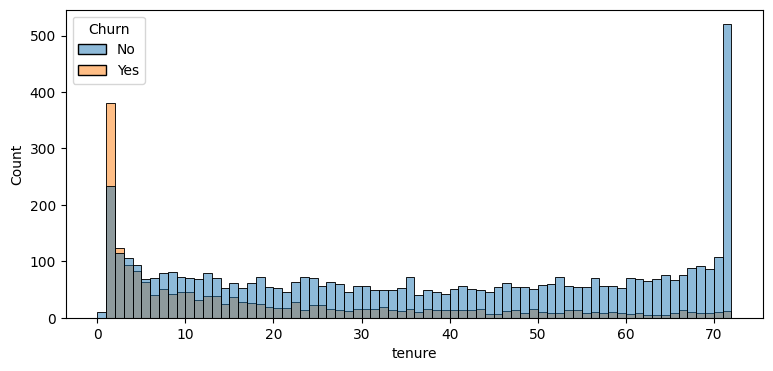

In [38]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data=df, bins=72, hue="Churn")
plt.savefig("../report/visuals/Churn_count_by_tenure.png", bbox_inches="tight" )
plt.show()

#people who have used our services for a long time have stayed and people who have used our sevices 1 to 2 months have churned

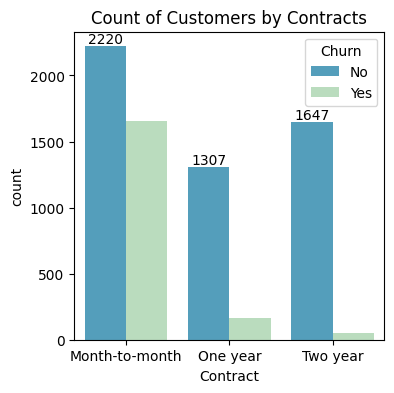

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn", palette="GnBu_r")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contracts")
plt.savefig("../report/visuals/Count_of_Customers_by_Contracts.png", bbox_inches="tight" )
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 


In [42]:
df.columns.values

array(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'], dtype=object)

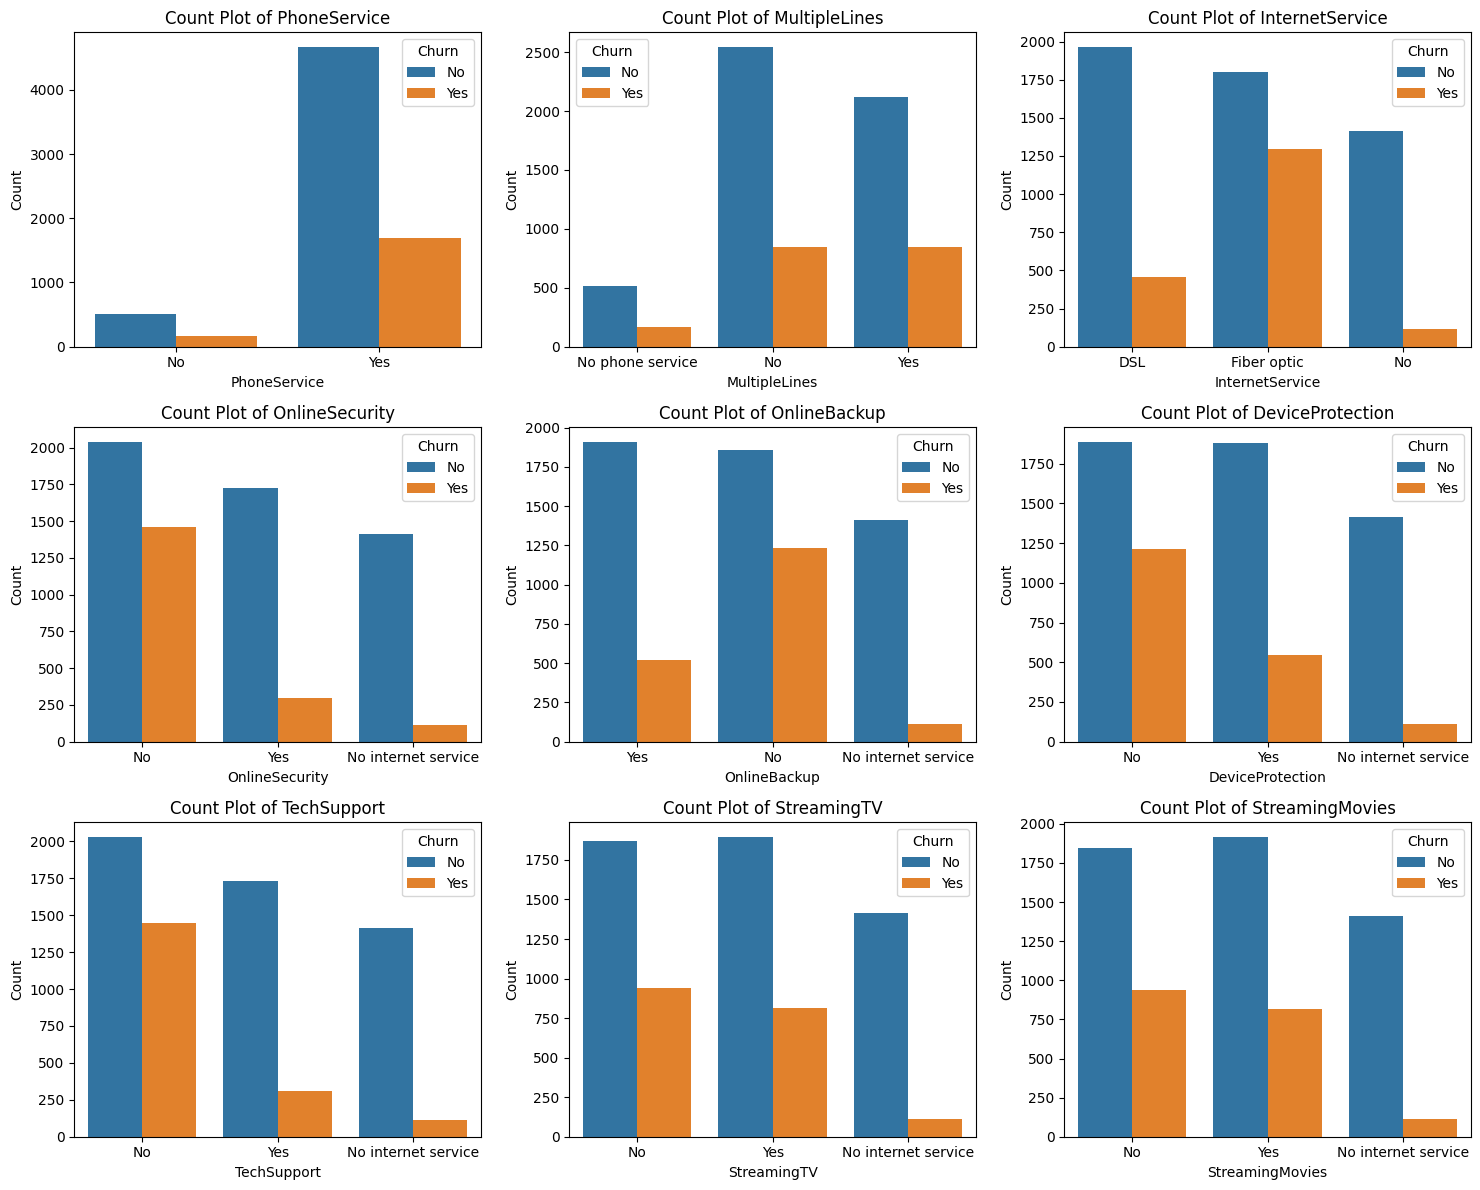

In [45]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("../report/visuals/Sub_plot_of_columns.png", bbox_inches="tight")
plt.show()

The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

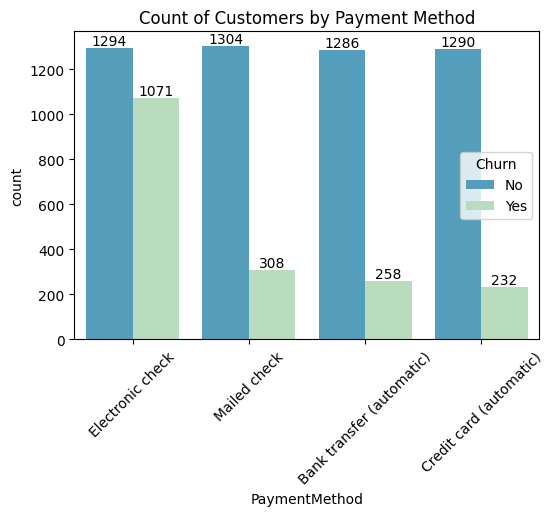

In [53]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn", palette="GnBu_r")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Payment Method")
plt.savefig("../report/visuals/Count_of_Customers_by_PaymentMethods.png", bbox_inches="tight" )
plt.xticks(rotation = 45)
plt.show()

customer is likely to churn when he is using electronic check as a payment method.